In [3]:
import numpy as np

# Load actual posterior samples from results
results_path = r"C:\Users\nishioka\Neuer Ordner\tmcmc_docs\tmcmc\_runs\m1_1000_20260118_083726_good\results_MAP_linearization.npz"
data = np.load(results_path)
posterior_samples = data['samples_M1']
theta_true_full = data['theta_true']
theta_MAP = data['MAP_M1']
theta_mean = data['mean_M1']

# Extract first 5 parameters for M1 (a11, a12, a22, b1, b2)
theta_true = theta_true_full[:5]

print(f"Loaded {posterior_samples.shape[0]} samples with {posterior_samples.shape[1]} parameters")
print(f"True values: {theta_true}")
print(f"MAP values: {theta_MAP}")
print(f"Mean values: {theta_mean}")

Loaded 1000 samples with 5 parameters
True values: [0.8 2.  1.  0.1 0.2]
MAP values: [0.6110304  2.26613368 0.83189202 0.09191102 0.22553493]
Mean values: [0.46647939 2.42499703 0.69915315 0.06486014 0.23973277]


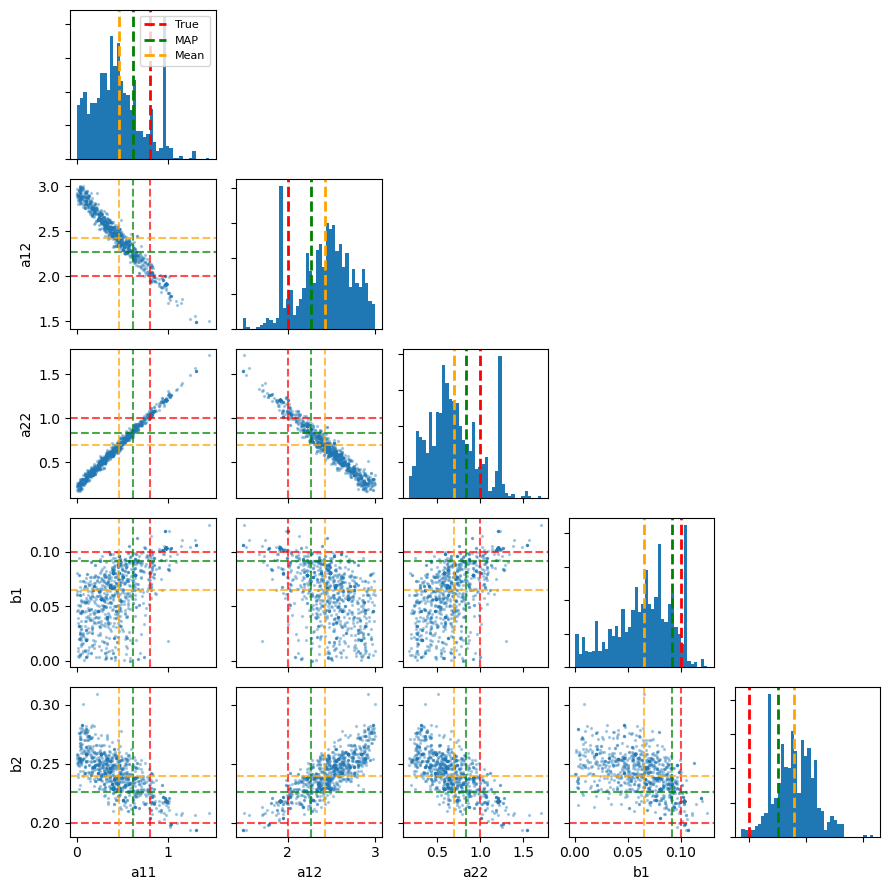

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# posterior_samples: numpy array with shape (N, 5)
# columns must match the paper order
cols = ["a11", "a12", "a22", "b1", "b2"]
df = pd.DataFrame(posterior_samples, columns=cols)

n = len(cols)
fig, axes = plt.subplots(n, n, figsize=(9, 9))

for i in range(n):
    for j in range(n):
        ax = axes[i, j]

        if i == j:
            # diagonal: histogram
            ax.hist(df[cols[i]].values, bins=40)
            # Add vertical lines for true, MAP, and mean
            ax.axvline(theta_true[i], color='red', linestyle='--', linewidth=2, label='True' if i == 0 else '')
            ax.axvline(theta_MAP[i], color='green', linestyle='--', linewidth=2, label='MAP' if i == 0 else '')
            ax.axvline(theta_mean[i], color='orange', linestyle='--', linewidth=2, label='Mean' if i == 0 else '')
        elif i > j:
            # lower triangle: scatter
            ax.scatter(df[cols[j]].values, df[cols[i]].values, s=2, alpha=0.3)
            # Add vertical and horizontal lines for true, MAP, and mean
            ax.axvline(theta_true[j], color='red', linestyle='--', linewidth=1.5, alpha=0.7)
            ax.axhline(theta_true[i], color='red', linestyle='--', linewidth=1.5, alpha=0.7)
            ax.axvline(theta_MAP[j], color='green', linestyle='--', linewidth=1.5, alpha=0.7)
            ax.axhline(theta_MAP[i], color='green', linestyle='--', linewidth=1.5, alpha=0.7)
            ax.axvline(theta_mean[j], color='orange', linestyle='--', linewidth=1.5, alpha=0.7)
            ax.axhline(theta_mean[i], color='orange', linestyle='--', linewidth=1.5, alpha=0.7)
        else:
            # upper triangle: empty (like Fig. 3)
            ax.axis("off")

        # labels only on outer axes
        if i == n - 1 and j < i:
            ax.set_xlabel(cols[j])
        else:
            ax.set_xticklabels([])

        if j == 0 and i > 0:
            ax.set_ylabel(cols[i])
        else:
            ax.set_yticklabels([])

# Add legend to first diagonal plot
axes[0, 0].legend(loc='upper right', fontsize=8)

plt.tight_layout()

# Save the plot
output_path = "pairplot_posterior_M1.png"
plt.savefig(output_path, dpi=150, bbox_inches='tight')
print(f"Plot saved to: {output_path}")

plt.show()


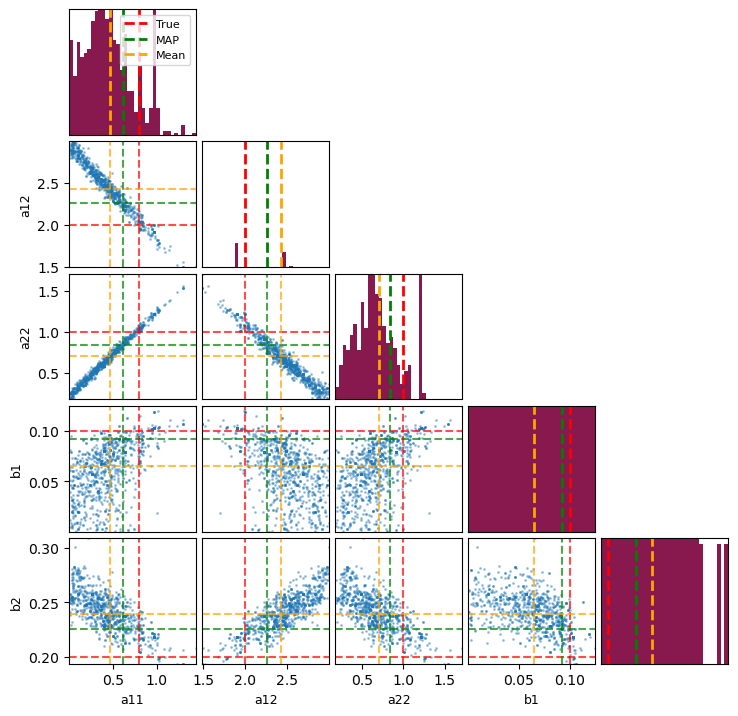

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cols = ["a11", "a12", "a22", "b1", "b2"]
df = pd.DataFrame(posterior_samples, columns=cols)

n = len(cols)
fig, axes = plt.subplots(n, n, figsize=(8.5, 8.5))

for i in range(n):
    for j in range(n):
        ax = axes[i, j]

        if i == j:
            # diagonal: filled histogram
            ax.hist(df[cols[i]],
                    bins=35,
                    density=True,
                    color="#7a003c",
                    alpha=0.9)
            # Add vertical lines for true, MAP, and mean
            ax.axvline(theta_true[i], color='red', linestyle='--', linewidth=2, label='True' if i == 0 else '')
            ax.axvline(theta_MAP[i], color='green', linestyle='--', linewidth=2, label='MAP' if i == 0 else '')
            ax.axvline(theta_mean[i], color='orange', linestyle='--', linewidth=2, label='Mean' if i == 0 else '')
        elif i > j:
            # lower triangle: dense scatter
            ax.scatter(df[cols[j]],
                       df[cols[i]],
                       s=1.2,
                       alpha=0.35,
                       color="#1f77b4",
                       rasterized=True)
            # Add vertical and horizontal lines for true, MAP, and mean
            ax.axvline(theta_true[j], color='red', linestyle='--', linewidth=1.5, alpha=0.7)
            ax.axhline(theta_true[i], color='red', linestyle='--', linewidth=1.5, alpha=0.7)
            ax.axvline(theta_MAP[j], color='green', linestyle='--', linewidth=1.5, alpha=0.7)
            ax.axhline(theta_MAP[i], color='green', linestyle='--', linewidth=1.5, alpha=0.7)
            ax.axvline(theta_mean[j], color='orange', linestyle='--', linewidth=1.5, alpha=0.7)
            ax.axhline(theta_mean[i], color='orange', linestyle='--', linewidth=1.5, alpha=0.7)
        else:
            ax.axis("off")
            continue

        # square panels
        ax.set_aspect("auto")
        ax.grid(False)

        # tight limits
        if i >= j:
            ax.set_xlim(df[cols[j]].min(), df[cols[j]].max())
            ax.set_ylim(df[cols[i]].min(), df[cols[i]].max())

        # labels only on outer edges
        if i == n - 1 and j < i:
            ax.set_xlabel(cols[j], fontsize=9)
        else:
            ax.set_xticks([])

        if j == 0 and i > 0:
            ax.set_ylabel(cols[i], fontsize=9)
        else:
            ax.set_yticks([])

# Add legend to first diagonal plot
axes[0, 0].legend(loc='upper right', fontsize=8)

plt.subplots_adjust(wspace=0.05, hspace=0.05)

# Save the plot
output_path = "pairplot_posterior_M1_refined.png"
plt.savefig(output_path, dpi=150, bbox_inches='tight')
print(f"Plot saved to: {output_path}")

plt.show()
